# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [78]:
import pandas as pd

In [79]:
dados = pd.read_csv('emp_automovel.csv')

In [80]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [81]:
x = dados.drop('inadimplente', axis =1)
y = dados ['inadimplente']

### Criando o modelo - Árvore de Decisão

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y) # Usar para ajustar aos dados
modelo.score(x, y) # Avaliação do modelo

1.0

In [84]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


### Separando em treino, validação e  teste

Como a acurácia é de 100%, indica que o modelo está acertando todas as classificações que realizou.

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# test_size porcentagem para ficar no teste
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

In [87]:
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [88]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [89]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8479226548210086


### Parâmetro max_depth

Como o desempenho está caindo, vamos usar o max_depth para ajustar a profundidade da árvore
Assim ele pode compreender melhor os dados e não decorar 

In [90]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205574912891986
Acurácia de validação: 0.9058444386377493


### Avaliando o Modelo

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
# Compara o modelo (y_previsto) com o real (y_val)
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10357   122]
 [  959    43]]


In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

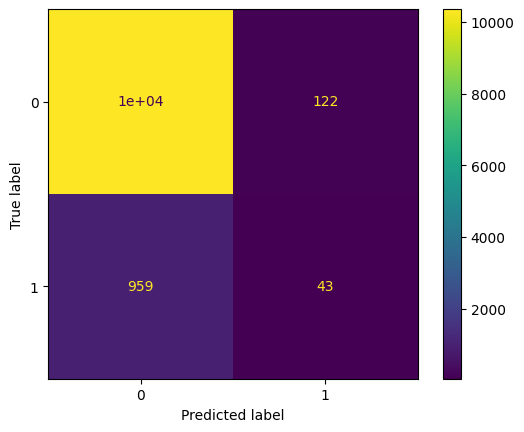

In [94]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();


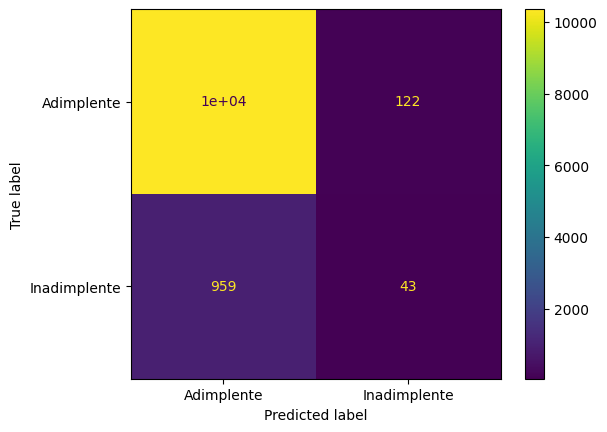

In [95]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

O modelo não está classificando bem o nosso problema

### Criando o modelo - Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
modelo = RandomForestClassifier(max_depth = 10)
                               
modelo.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=10)

In [98]:
modelo.score(x, y)

0.9147013349012434

In [99]:
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9153600464576074
Acurácia de validação: 0.9127253723543245


In [100]:
# Compara o modelo (y_previsto) com o real (y_val)
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10478     1]
 [ 1001     1]]


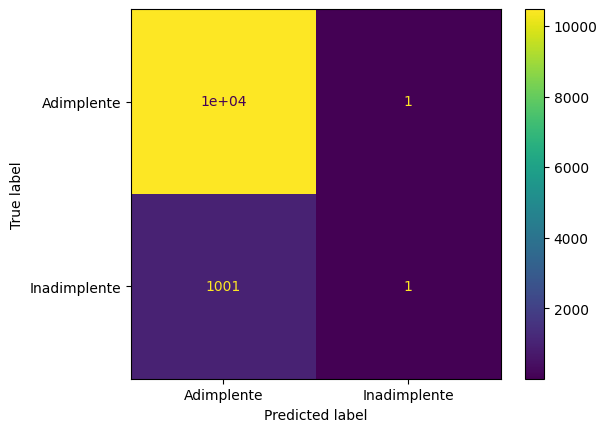

In [101]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

A partir dessa matriz, percebemos que apesar de uma acurácia maior, o modelo RandomForest não consegue identificar quase nenhum cliente inadimplente, indicando um resultado bem ruim em relação ao modelo de árvore de decisão.

### Acurácia

In [102]:
from sklearn.metrics import accuracy_score

In [105]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9127253723543245


### Métricas de Precisão e  Recall

Metricas para abordar os verdadeiros positivos

Precisão: considera somente os valores previstos pelo modelo que representam a presença da característica. (2º coluna).
Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos.

Recall: os valores reais em que a característica está presente. (2º linha).Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos.

In [106]:
from sklearn.metrics import precision_score, recall_score

In [107]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.5
Recall: 0.000998003992015968


o nosso modelo não está performando bem.

A métrica que avaliará se a empresa não vai incorrer em tanto prejuízo financeiro é a taxa de recall, já que ela avalia os valores reais de pessoas inadimplentes.

### Métrica F1 Score

Equilibrio entre as duas métricas

In [109]:
from sklearn.metrics import f1_score

In [110]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.00199203187250996


### Curva ROC

In [111]:
from sklearn.metrics import RocCurveDisplay

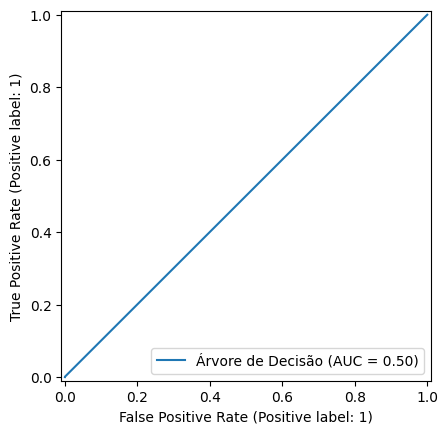

In [112]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

Se a curva estiver o mais próxima possível do canto superior esquerdo do gráfico (ou seja, do ponto 0 no eixo X e 1 no eixo Y), significa que o modelo é eficiente em diferenciar uma classe da outra.

Quando a curva se aproxima de uma linha diagonal traçada no gráfico, indica que o modelo é ineficiente, classificando os dados de maneira aleatória.

### AUC Area Under the Curve (Área Sob a Curva)

In [113]:
from sklearn.metrics import roc_auc_score

In [114]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5004512875194358


Quando mais próximo de 1, o modelo é mais preciso

### Curva de precisão x recall

In [115]:

from sklearn.metrics import PrecisionRecallDisplay

O modelo vai ser melhor nesse equilíbrio entre essas duas métricas, quanto mais próximo do ponto 1,1 (ou seja, do canto superior direito).

E quanto mais próximo do ponto 0,0, do canto inferior esquerdo, pior será o modelo. No nosso caso, vemos que a curva está muito próxima do ponto 0,0.

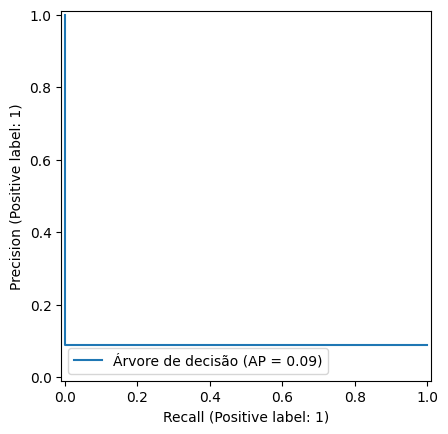

In [116]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

### Métrica Average Precision (AP, precisão média)

In [117]:
from sklearn.metrics import average_precision_score


In [118]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.08768652921489135


### Relatório de Métricas

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_val, y_previsto))
# Suporte - é a quantidade
# macro avg é a média
#weighted é a média ponderada 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.50      0.00      0.00      1002

    accuracy                           0.91     11481
   macro avg       0.71      0.50      0.48     11481
weighted avg       0.88      0.91      0.87     11481



Como os dados estão desequilibrados, temos uma melhor precisão na classe 0.


### KFold - Validação Cruzada

Divide em 5 partes - 1 para validação e 4 para teste

In [121]:
from sklearn.model_selection import cross_validate, KFold

In [122]:
# n_splits quantas partes vamos dividir.
# shuffle embaralha os dados

modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [123]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.83210564, 0.38301945, 0.39987206, 0.97638059, 0.39856482]),
 'score_time': array([0.09132171, 0.00398064, 0.00299764, 0.0179801 , 0.0039916 ]),
 'test_score': array([0.91322809, 0.90733885, 0.90777439, 0.9135453 , 0.8997169 ])}

In [124]:
cv_resultados['test_score']

array([0.91322809, 0.90733885, 0.90777439, 0.9135453 , 0.8997169 ])

In [125]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8982542557193584, 0.9183871542070668]


### Validação Cruzada com Recall

In [126]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [127]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.98182273, 0.27072453, 0.25708127, 0.26447797, 0.28369164]),
 'score_time': array([0.1680603 , 0.0119679 , 0.0090344 , 0.01098514, 0.02203083]),
 'test_score': array([0.02509908, 0.01732673, 0.0196802 , 0.0156658 , 0.02427746])}

In [128]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.012953779321931883, 0.027865923783871156]


### Validação Cruzada com Geral

In [129]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.23753786, 0.26806092, 0.22245932, 0.22340822, 0.22265172]),
 'score_time': array([0.2633431 , 0.0209949 , 0.0159421 , 0.01799679, 0.04199529]),
 'test_accuracy': array([0.91388133, 0.90744774, 0.90755662, 0.91387195, 0.89906359]),
 'test_recall': array([0.02906209, 0.0210396 , 0.0196802 , 0.0156658 , 0.02427746]),
 'test_precision': array([0.28205128, 0.22368421, 0.23529412, 0.24489796, 0.20192308]),
 'test_f1': array([0.05269461, 0.03846154, 0.03632236, 0.02944785, 0.04334365])}

In [130]:
def relatorio_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

In [131]:
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.8974548913901379, 0.9192735980990496]
Intervalo de confiança(test_recall): [0.012935222059937893, 0.0309548343163309]
Intervalo de confiança(test_precision): [0.1846476852313828, 0.29049257330118006]
Intervalo de confiança(test_f1): [0.024573479158171395, 0.0555345273238101]


### StratifiedKFold

 realiza o KFold de maneira estratificada, levando em conta a proporção de dados de clientes adimplentes e inadimplentes.

In [132]:
dados['inadimplente'].value_counts(normalize = True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [165]:
from sklearn.model_selection import StratifiedKFold

In [134]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

In [166]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.2487717465181764, 0.4845970786100143]


### Estratégias para melhorar o desempenho do equilibrando a quantidade de dados

### Oversampling - SMOTE

Cria novos dados sintéticos com padrão semelhante aos dados que já existem.

In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [140]:
y_balanceado.value_counts(normalize = True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [141]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

In [142]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7134253723412257, 0.7605208288437347]


O que fizemos aqui não é completamente correto, porque balanceamos todos os nossos dados e no momento da avaliação, avaliamos esses dados já balanceados

### Pipeline de validação

In [144]:
from imblearn.pipeline import Pipeline as imbpipeline

In [145]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [146]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [147]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.2061396157083696, 0.2907448896325228]


### Undersampling - NearMiss

In [148]:
from imblearn.under_sampling import NearMiss

In [149]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

In [150]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [151]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6193342982987752, 0.7026734164966332]


### Testando o modelo

In [152]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [154]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [155]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



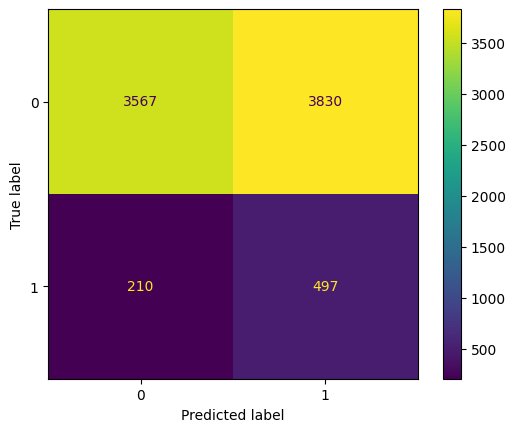

In [156]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

### SMOTEENN

In [157]:
from imblearn.combine import SMOTEENN

In [158]:
sme = SMOTEENN(random_state=42)
x_sme, y_sme = sme.fit_resample(x, y)

In [162]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_sme, y_sme)
y_previsto = modelo.predict(x_sme)

In [164]:
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.2487717465181764, 0.4845970786100143]


              precision    recall  f1-score   support

           0       0.77      0.81      0.79     22623
           1       0.82      0.78      0.80     25192

    accuracy                           0.80     47815
   macro avg       0.79      0.80      0.79     47815
weighted avg       0.80      0.80      0.80     47815



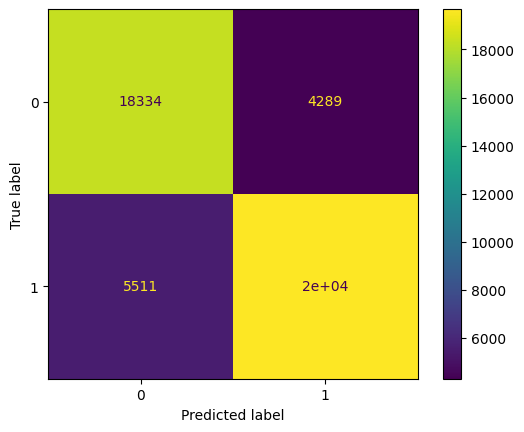

In [163]:
print(classification_report(y_sme, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_sme, y_previsto);